# Decision trees

* nonparametric model (no. of parameters are not decided before training)
* nonparametric models usually tend to overfit

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Training and visualising Decision tree

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris = load_iris()
X = iris.data[:, 2: ] #petal length and width
y = iris.target

In [5]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y) #by default CART algorithm minimises the gini impurity

DecisionTreeClassifier(max_depth=2)

In [6]:
from sklearn.tree import export_graphviz

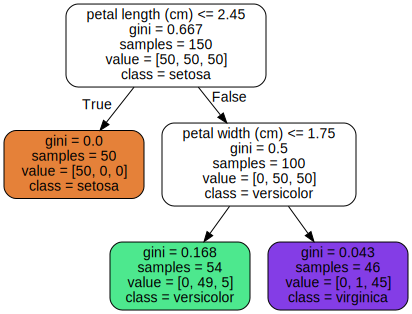

In [7]:
from graphviz import Source

export_graphviz(
tree_clf, 
out_file = os.path.join(IMAGES_PATH, "iris_tree.dot"),
feature_names = iris.feature_names[2:],
class_names = iris.target_names,
rounded = True,
filled = True)
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [11]:
tree_clf.tree_.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

## Estimating Class probabilities

In [12]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [13]:
tree_clf.predict([[5, 1.5]])

array([1])

## Regularization

* Increase the min* features and decrease the max* features
* other algorithms work by first training the decision tree without restrictions and then pruning the nodes where purity improvment  is statistically insignificant 

In [14]:
from sklearn.datasets import make_moons

In [15]:
X_moons, y_moons = make_moons(n_samples = 150, noise = 0.2, random_state = 42)
tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf= 5, random_state = 42 )
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [16]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)

In [17]:
tree_clf1.score(X_moons_test, y_moons_test) #overfit

0.898

In [18]:
tree_clf2.score(X_moons_test, y_moons_test) #better generalization

0.92

# Regression

The CART algorithm now tries to minimise MSE at each node

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
np.random.seed(42)

In [21]:
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad**2 + 0.025 * np.random.randn(200,1)

In [22]:
tree_reg = DecisionTreeRegressor(max_depth = 2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

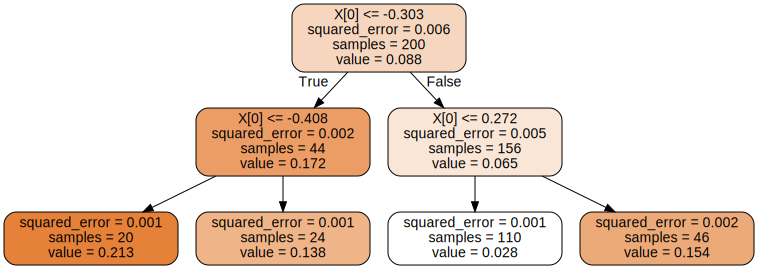

In [23]:
export_graphviz(
tree_reg, 
out_file = os.path.join(IMAGES_PATH, "reg_tree.dot"),
rounded = True,
filled = True)
Source.from_file(os.path.join(IMAGES_PATH, "reg_tree.dot"))

## problems with Decision trees

* sensitivity to axis orientation in data ( scale the data and apply PCA)
* High variance (use random forest)


### Exercises

What is the approximate depth of a decision tree trained (without restrictions) on a training set with one million instances?

In [24]:
# depth = log2(m), assuming tree is binary

from math import log
log(10**6, 2)

19.931568569324174

Is a node’s Gini impurity generally lower or higher than its parent’s? Is it generally lower/higher, or always lower/higher?

In [25]:
''' 
Generally a node's gini impurity is lower than the parent as
lower level nodes tends to contain examples from specific class 
in higher ratios than the parent node does.

This may not always be the case as descendent nodes may contain
same ratio of instances from the corrensponding classes as their
ancestor nodes do.

'''

" \nGenerally a node's gini impurity is lower than the parent as\nlower level nodes tends to contain examples from specific class \nin higher ratios than the parent node does.\n\nThis may not always be the case as descendent nodes may contain\nsame ratio of intances from the corrensponding classes as their\nancestor nodes do.\n\n"

If a decision tree is overfitting the training set, is it a good idea to try decreasing max_depth?

In [26]:
# Yes, decreasing max_depth will make tree not to overclassify

If a decision tree is underfitting the training set, is it a good idea to try scaling the input features?

In [27]:
#Decision Trees don't care whether or not the training data is scaled or centered; 
#So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.

If it takes one hour to train a decision tree on a training set containing one million instances, roughly how much time will it take to train another decision tree on a training set containing ten million instances? Hint: consider the CART algorithm’s computational complexity.

In [36]:
# Decision tree's complexity is O(n x mlogm)
print("approx", round(10 * log(10**7)/log(10**6)), "hours")

approx 12 hours


If it takes one hour to train a decision tree on a given training set, roughly how much time will it take if you double the number of features?

In [38]:
# two hours

Train and fine-tune a decision tree for the moons dataset

In [40]:
X, y = make_moons(n_samples = 10000, noise = 0.4)

In [41]:
X.shape

(10000, 2)

In [42]:
y.shape

(10000,)

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [47]:
from matplotlib.colors import ListedColormap

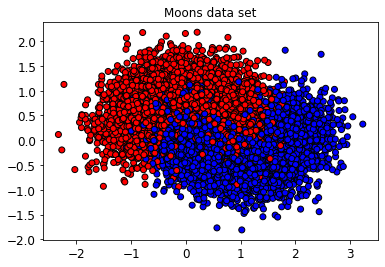

In [61]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

ax = plt.subplots()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
plt.title('Moons data set')
plt.show()

In [62]:
# training

clf1 = DecisionTreeClassifier(random_state=42)

In [63]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.metrics import accuracy_score

In [68]:
clf1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [76]:
tuned_param = {"max_depth": [2,4,8,16,32,64], "max_leaf_nodes": [2,4,8, 10, 20,50,100,1000,10000]}

In [77]:
grid_search = GridSearchCV(clf1, tuned_param, cv = 3, scoring='accuracy')

In [78]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64],
                         'max_leaf_nodes': [2, 4, 8, 10, 20, 50, 100, 1000,
                                            10000]},
             scoring='accuracy')

In [79]:
grid_search.best_params_

{'max_depth': 8, 'max_leaf_nodes': 20}

In [80]:
from sklearn.base import clone

In [81]:
best_clf = clone(grid_search.best_estimator_)

In [83]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, random_state=42)

In [84]:
y_pred = best_clf.predict(X_test)

In [85]:
accuracy_score(y_pred, y_test)

0.8545

In [86]:
pred_y = grid_search.best_estimator_.predict(X_test)

In [87]:
accuracy_score(y_pred,y_test)

0.8545

In [100]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#FF0000", "#0000FF"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(["#FF0000", "#0000FF"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

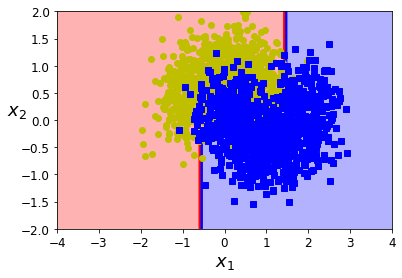

In [101]:
plot_decision_boundary(best_clf, X_test, y_test,axes = [-4,4,-2,2], iris=False)